# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:42:53 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=534147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=550006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

18:42:54 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=608242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=76318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=853117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=987768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:42:55 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=888904;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=935140;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

18:42:56 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=655188;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=815636;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

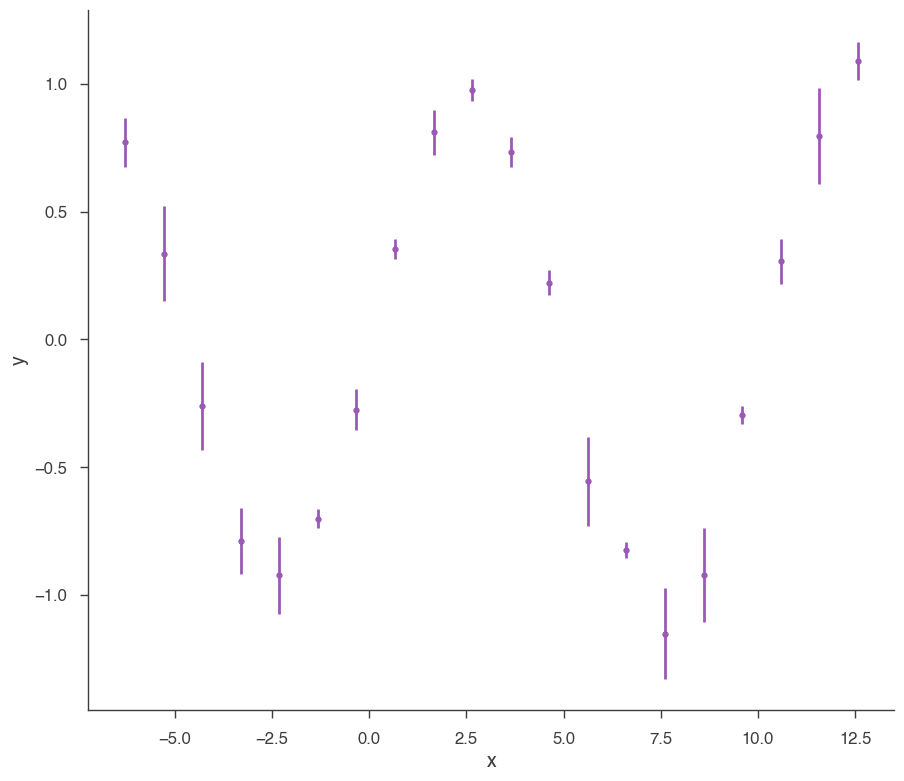

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=266925;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=202327;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:42:59 INFO      Mean acceptance fraction: 0.7161                                            ]8;id=771946;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=614412;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

18:43:00 INFO      fit restored to maximum of posterior                                         ]8;id=228820;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=16600;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=747241;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=288337;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.83 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.94 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.372935
total,-5.372935


Values of statistical measures:

,statistical measures
AIC,15.451751
BIC,16.737334
DIC,14.871668
PDIC,2.062935


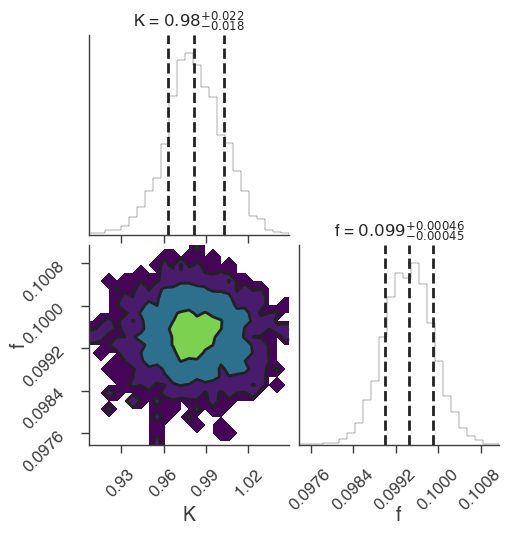

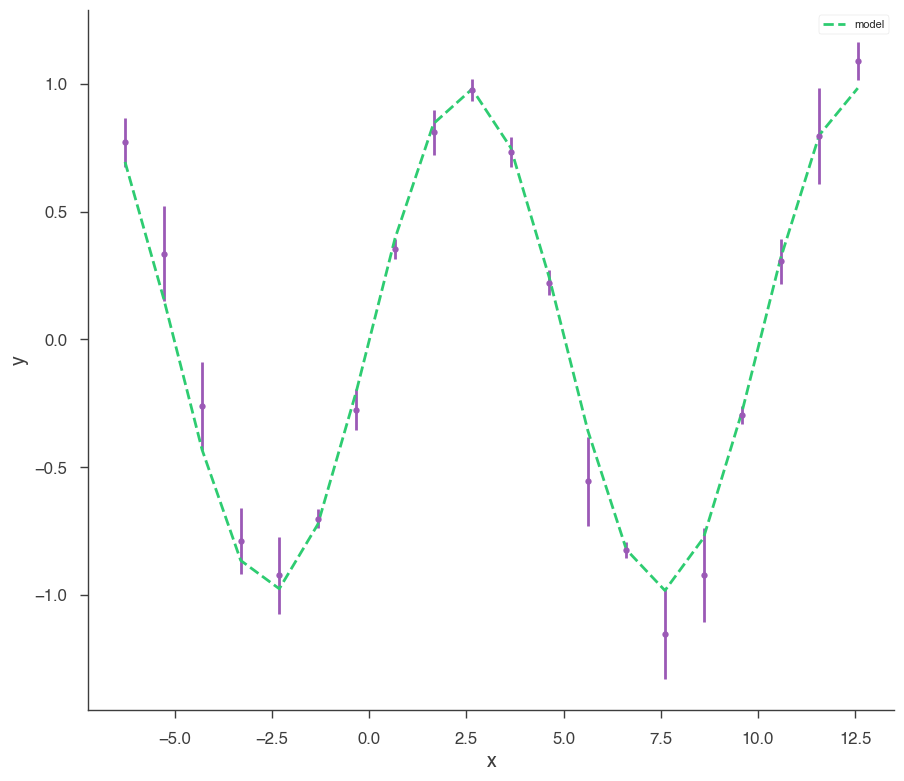

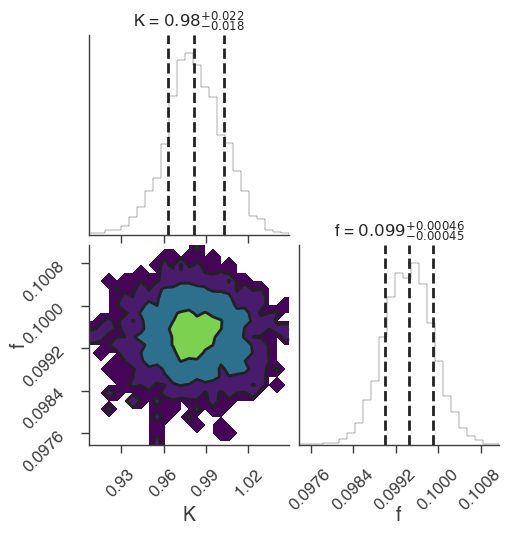

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

         INFO      sampler set to multinest                                                ]8;id=302901;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=974459;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -14.612982646727215      +/-  0.14299798749126899     
 Total Likelihood Evaluations:         5226
 Sampling finished. Exiting MultiNest



18:43:01 INFO      fit restored to maximum of posterior                                         ]8;id=282675;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=514663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=978176;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=6771;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.22 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.95 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.373665
total,-5.373665


Values of statistical measures:

,statistical measures
AIC,15.453212
BIC,16.738794
DIC,15.049305
PDIC,2.149384
log(Z),-6.346338


         INFO      deleting the chain directory chains                                     ]8;id=388236;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=379367;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

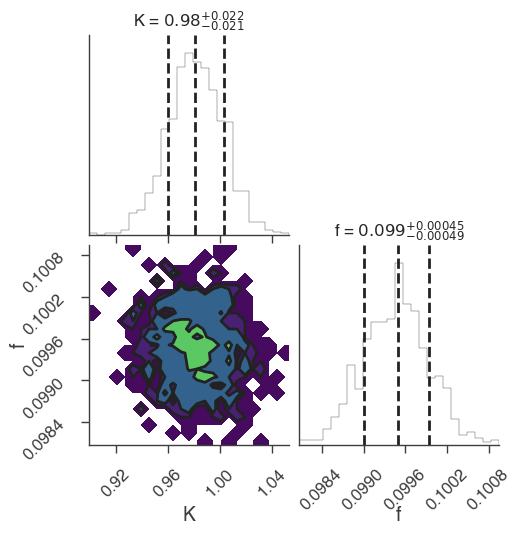

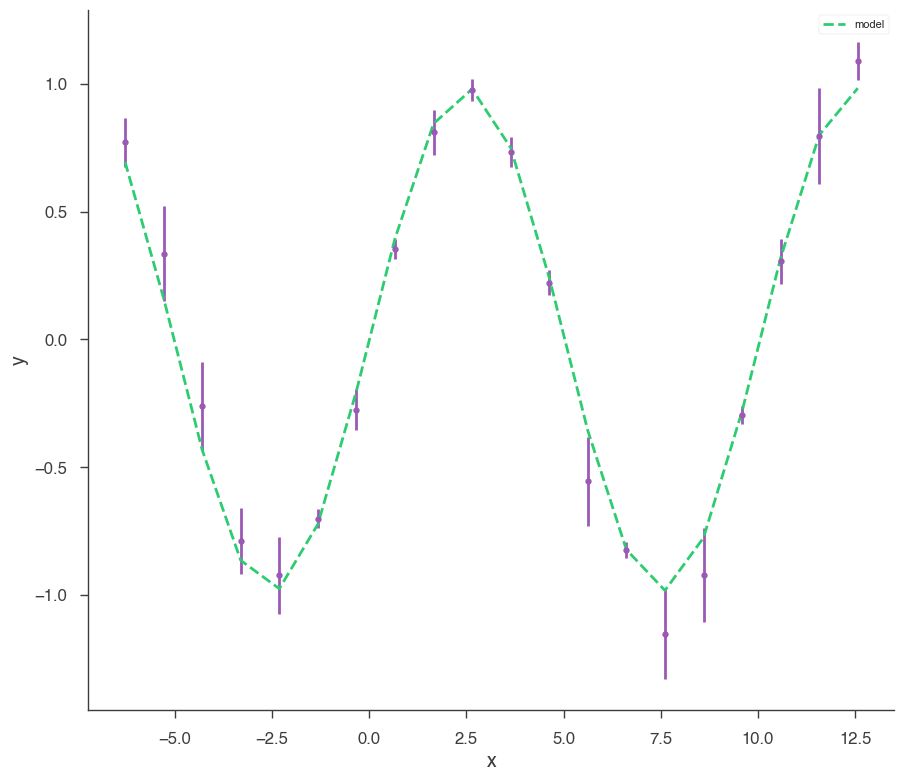

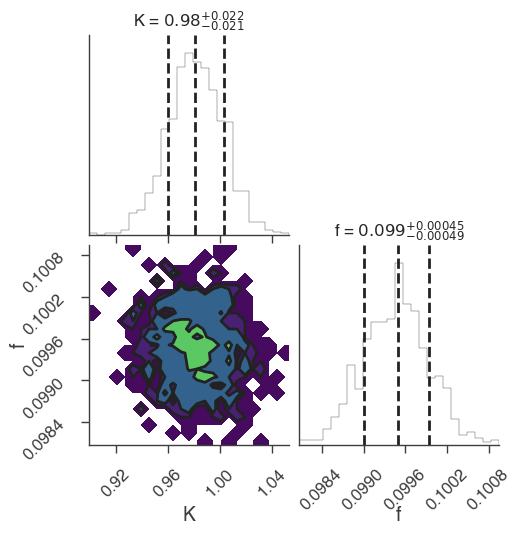

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

18:43:02 INFO      sampler set to dynesty_nested                                           ]8;id=643432;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=303911;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

226it [00:00, 2166.66it/s, bound: 0 | nc: 13 | ncall: 700 | eff(%): 32.286 | loglstar:   -inf < -2127.965 <    inf | logz: -2134.654 +/-  0.123 | dlogz: 2126.055 >  0.409]

443it [00:00, 1921.38it/s, bound: 0 | nc: 2 | ncall: 1165 | eff(%): 38.026 | loglstar:   -inf < -1564.678 <    inf | logz: -1571.958 +/-  0.127 | dlogz: 1562.718 >  0.409]

637it [00:00, 1614.82it/s, bound: 0 | nc: 2 | ncall: 1995 | eff(%): 31.930 | loglstar:   -inf < -1250.401 <    inf | logz: -1258.117 +/-  0.131 | dlogz: 1248.563 >  0.409]

803it [00:00, 1288.83it/s, bound: 0 | nc: 12 | ncall: 3047 | eff(%): 26.354 | loglstar:   -inf < -1054.233 <    inf | logz: -1061.849 +/-  0.131 | dlogz: 1051.353 >  0.409]

941it [00:00, 977.94it/s, bound: 0 | nc: 9 | ncall: 4537 | eff(%): 20.741 | loglstar:   -inf < -870.732 <    inf | logz: -878.510 +/-  0.136 | dlogz: 868.945 >  0.409]     

1051it [00:00, 868.03it/s, bound: 0 | nc: 43 | ncall: 5928 | eff(%): 17.729 | loglstar:   -inf < -607.563 <    inf | logz: -616.383 +/-  0.144 | dlogz: 607.375 >  0.409]

1146it [00:01, 701.49it/s, bound: 0 | nc: 22 | ncall: 7344 | eff(%): 15.605 | loglstar:   -inf < -442.863 <    inf | logz: -451.559 +/-  0.142 | dlogz: 441.796 >  0.409]

1224it [00:01, 619.81it/s, bound: 0 | nc: 21 | ncall: 8896 | eff(%): 13.759 | loglstar:   -inf < -352.000 <    inf | logz: -360.237 +/-  0.139 | dlogz: 349.824 >  0.409]

1291it [00:01, 529.56it/s, bound: 0 | nc: 41 | ncall: 10431 | eff(%): 12.377 | loglstar:   -inf < -298.743 <    inf | logz: -308.089 +/-  0.145 | dlogz: 298.044 >  0.409]

1348it [00:01, 445.07it/s, bound: 0 | nc: 33 | ncall: 11939 | eff(%): 11.291 | loglstar:   -inf < -262.609 <    inf | logz: -270.955 +/-  0.139 | dlogz: 260.720 >  0.409]

1396it [00:01, 384.15it/s, bound: 0 | nc: 12 | ncall: 13177 | eff(%): 10.594 | loglstar:   -inf < -238.871 <    inf | logz: -248.307 +/-  0.144 | dlogz: 240.044 >  0.409]

1437it [00:02, 285.95it/s, bound: 1 | nc: 1 | ncall: 14316 | eff(%): 10.038 | loglstar:   -inf < -217.737 <    inf | logz: -226.650 +/-  0.141 | dlogz: 217.978 >  0.409] 

1626it [00:02, 544.56it/s, bound: 1 | nc: 2 | ncall: 14580 | eff(%): 11.152 | loglstar:   -inf < -141.189 <    inf | logz: -149.969 +/-  0.141 | dlogz: 140.611 >  0.409]

1764it [00:02, 593.97it/s, bound: 2 | nc: 3 | ncall: 14900 | eff(%): 11.839 | loglstar:   -inf < -102.659 <    inf | logz: -111.404 +/-  0.141 | dlogz: 101.823 >  0.409]

1980it [00:02, 882.74it/s, bound: 2 | nc: 1 | ncall: 15242 | eff(%): 12.990 | loglstar:   -inf < -60.670 <    inf | logz: -69.386 +/-  0.141 | dlogz: 59.166 >  0.409]   

2099it [00:02, 827.81it/s, bound: 3 | nc: 1 | ncall: 15503 | eff(%): 13.539 | loglstar:   -inf < -47.458 <    inf | logz: -56.401 +/-  0.141 | dlogz: 45.871 >  0.409]

2316it [00:02, 1104.74it/s, bound: 3 | nc: 1 | ncall: 15827 | eff(%): 14.633 | loglstar:   -inf < -29.767 <    inf | logz: -38.826 +/-  0.141 | dlogz: 27.719 >  0.409]

2454it [00:03, 958.03it/s, bound: 4 | nc: 1 | ncall: 16125 | eff(%): 15.219 | loglstar:   -inf < -21.816 <    inf | logz: -30.677 +/-  0.142 | dlogz: 19.200 >  0.409] 

2637it [00:03, 1140.69it/s, bound: 4 | nc: 4 | ncall: 16393 | eff(%): 16.086 | loglstar:   -inf < -15.702 <    inf | logz: -24.530 +/-  0.140 | dlogz: 12.580 >  0.409]

2779it [00:03, 982.26it/s, bound: 5 | nc: 2 | ncall: 16701 | eff(%): 16.640 | loglstar:   -inf < -12.852 <    inf | logz: -21.645 +/-  0.140 | dlogz:  9.333 >  0.409] 

2967it [00:03, 1172.68it/s, bound: 5 | nc: 1 | ncall: 16941 | eff(%): 17.514 | loglstar:   -inf < -10.009 <    inf | logz: -18.877 +/-  0.141 | dlogz:  6.092 >  0.409]

3125it [00:03, 1265.24it/s, bound: 5 | nc: 4 | ncall: 17270 | eff(%): 18.095 | loglstar:   -inf < -8.423 <    inf | logz: -17.343 +/-  0.141 | dlogz:  4.174 >  0.409] 

3270it [00:03, 1119.86it/s, bound: 6 | nc: 1 | ncall: 17472 | eff(%): 18.716 | loglstar:   -inf < -7.481 <    inf | logz: -16.426 +/-  0.141 | dlogz:  2.932 >  0.409]

3441it [00:03, 1256.53it/s, bound: 6 | nc: 7 | ncall: 17821 | eff(%): 19.309 | loglstar:   -inf < -6.700 <    inf | logz: -15.657 +/-  0.141 | dlogz:  1.851 >  0.409]

3581it [00:04, 1080.68it/s, bound: 7 | nc: 1 | ncall: 18023 | eff(%): 19.869 | loglstar:   -inf < -6.348 <    inf | logz: -15.244 +/-  0.141 | dlogz:  1.253 >  0.409]

3732it [00:04, 1177.77it/s, bound: 7 | nc: 3 | ncall: 18262 | eff(%): 20.436 | loglstar:   -inf < -6.045 <    inf | logz: -14.946 +/-  0.141 | dlogz:  0.820 >  0.409]

3863it [00:04, 1035.78it/s, bound: 8 | nc: 1 | ncall: 18544 | eff(%): 20.832 | loglstar:   -inf < -5.855 <    inf | logz: -14.762 +/-  0.141 | dlogz:  0.566 >  0.409]

3979it [00:04, 1064.42it/s, +335 | bound: 8 | nc: 1 | ncall: 19033 | eff(%): 23.072 | loglstar:   -inf < -5.449 <    inf | logz: -14.346 +/-  0.141 | dlogz:  0.060 >  0.409]

3979it [00:04, 897.13it/s, +400 | bound: 8 | nc: 1 | ncall: 19098 | eff(%): 23.420 | loglstar:   -inf < -5.392 <    inf | logz: -14.288 +/-  0.140 | dlogz:  0.001 >  0.409] 

18:43:07 INFO      fit restored to maximum of posterior                                         ]8;id=487894;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=435500;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=27128;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=635234;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.94 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.373439
total,-5.373439


Values of statistical measures:

,statistical measures
AIC,15.452760
BIC,16.738342
DIC,14.675127
PDIC,1.964338
log(Z),-6.205398


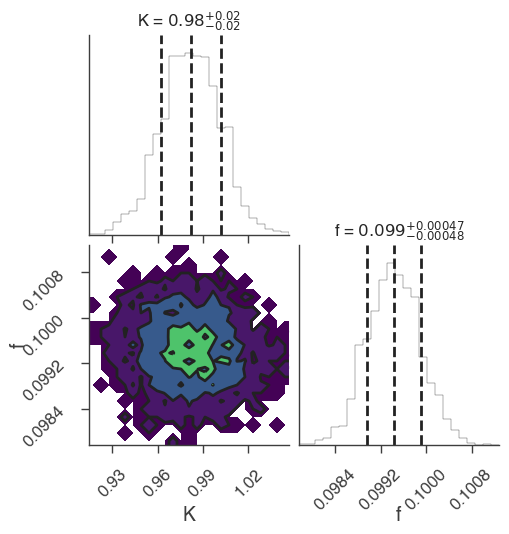

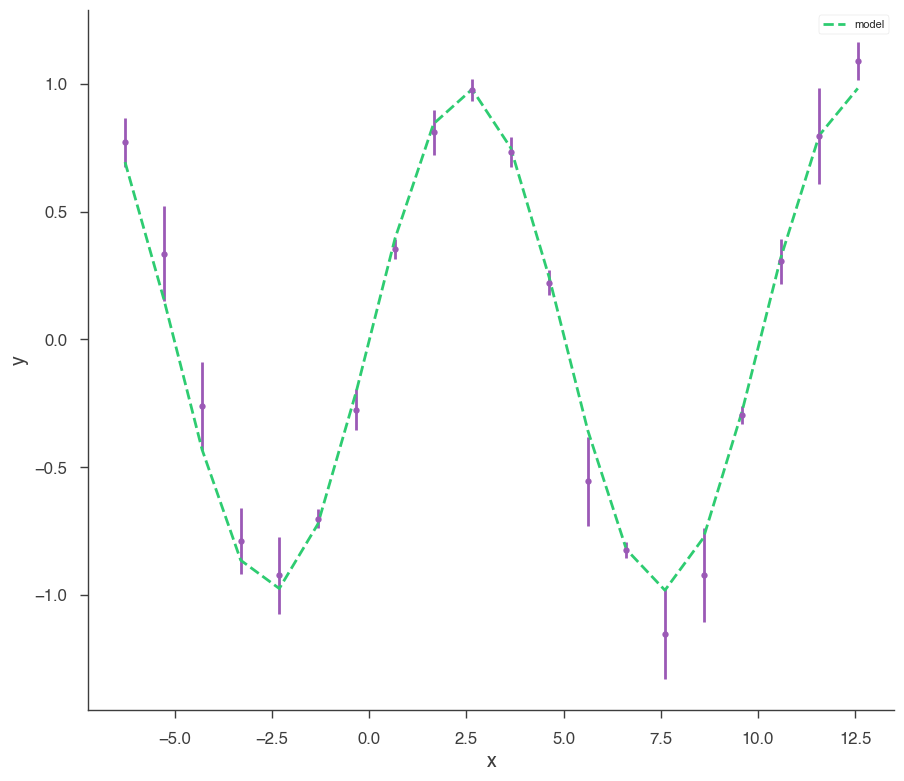

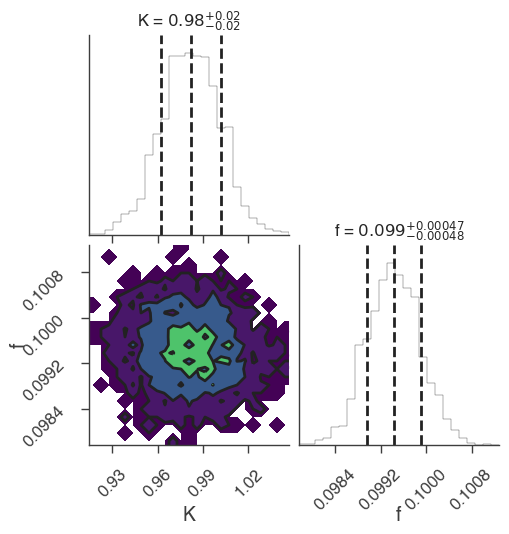

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

         INFO      sampler set to dynesty_dynamic                                          ]8;id=982364;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=182294;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

141it [00:00, 1408.96it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 166 | eff(%): 21.171 | loglstar:   -inf < -2591.582 <    inf | logz: -2598.771 +/-  0.120 | dlogz: 2608.870 >  0.010]

351it [00:00, 1810.04it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 526 | eff(%): 34.211 | loglstar:   -inf < -1894.616 <    inf | logz: -1902.223 +/-  0.123 | dlogz: 1899.704 >  0.010]

532it [00:00, 1728.53it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 929 | eff(%): 37.229 | loglstar:   -inf < -1569.773 <    inf | logz: -1575.870 +/-  0.107 | dlogz: 1568.370 >  0.010]

706it [00:00, 1562.42it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 1526 | eff(%): 34.847 | loglstar:   -inf < -1337.750 <    inf | logz: -1344.573 +/-  0.111 | dlogz: 1336.933 >  0.010]

865it [00:00, 1257.34it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 2398 | eff(%): 29.848 | loglstar:   -inf < -1187.088 <    inf | logz: -1195.438 +/-  0.123 | dlogz: 1188.652 >  0.010]

999it [00:00, 1039.86it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 3350 | eff(%): 25.948 | loglstar:   -inf < -1042.815 <    inf | logz: -1051.563 +/-  0.128 | dlogz: 1045.046 >  0.010]

1113it [00:00, 879.02it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 4369 | eff(%): 22.859 | loglstar:   -inf < -925.748 <    inf | logz: -933.395 +/-  0.116 | dlogz: 924.814 >  0.010]   

1210it [00:01, 762.31it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 5386 | eff(%): 20.557 | loglstar:   -inf < -795.432 <    inf | logz: -803.717 +/-  0.126 | dlogz: 795.504 >  0.010] 

1293it [00:01, 667.84it/s, batch: 0 | bound: 0 | nc: 23 | ncall: 6531 | eff(%): 18.390 | loglstar:   -inf < -599.238 <    inf | logz: -608.290 +/-  0.131 | dlogz: 600.640 >  0.010]

1365it [00:01, 642.67it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 7567 | eff(%): 16.921 | loglstar:   -inf < -496.358 <    inf | logz: -505.460 +/-  0.130 | dlogz: 497.262 >  0.010] 

1432it [00:01, 606.41it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 8458 | eff(%): 15.986 | loglstar:   -inf < -418.042 <    inf | logz: -426.460 +/-  0.123 | dlogz: 417.384 >  0.010]

1494it [00:01, 480.21it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 9983 | eff(%): 14.252 | loglstar:   -inf < -356.526 <    inf | logz: -365.029 +/-  0.124 | dlogz: 355.788 >  0.010]

1546it [00:01, 446.72it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 11377 | eff(%): 13.017 | loglstar:   -inf < -325.036 <    inf | logz: -333.452 +/-  0.122 | dlogz: 324.026 >  0.010]

1593it [00:02, 411.17it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 12628 | eff(%): 12.134 | loglstar:   -inf < -294.621 <    inf | logz: -303.508 +/-  0.122 | dlogz: 294.069 >  0.010]

1636it [00:02, 349.70it/s, batch: 0 | bound: 0 | nc: 54 | ncall: 13719 | eff(%): 11.506 | loglstar:   -inf < -271.137 <    inf | logz: -279.932 +/-  0.128 | dlogz: 271.861 >  0.010]

1673it [00:02, 304.28it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 14856 | eff(%): 10.895 | loglstar:   -inf < -253.225 <    inf | logz: -262.243 +/-  0.130 | dlogz: 254.169 >  0.010]

1705it [00:02, 286.92it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 15976 | eff(%): 10.348 | loglstar:   -inf < -237.791 <    inf | logz: -246.250 +/-  0.123 | dlogz: 237.662 >  0.010]

1735it [00:02, 218.64it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 16797 | eff(%): 10.031 | loglstar:   -inf < -226.292 <    inf | logz: -234.613 +/-  0.122 | dlogz: 225.927 >  0.010] 

1952it [00:02, 580.14it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17098 | eff(%): 11.092 | loglstar:   -inf < -157.614 <    inf | logz: -166.082 +/-  0.125 | dlogz: 156.891 >  0.010]

2126it [00:03, 822.92it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17430 | eff(%): 11.857 | loglstar:   -inf < -117.793 <    inf | logz: -126.694 +/-  0.127 | dlogz: 117.168 >  0.010]

2236it [00:03, 727.13it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17612 | eff(%): 12.345 | loglstar:   -inf < -95.239 <    inf | logz: -103.754 +/-  0.124 | dlogz: 93.921 >  0.010]  

2433it [00:03, 990.81it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17900 | eff(%): 13.223 | loglstar:   -inf < -67.117 <    inf | logz: -75.937 +/-  0.126 | dlogz: 65.698 >  0.010] 

2598it [00:03, 1144.12it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18256 | eff(%): 13.852 | loglstar:   -inf < -49.771 <    inf | logz: -58.679 +/-  0.126 | dlogz: 48.086 >  0.010]

2735it [00:03, 941.03it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18450 | eff(%): 14.433 | loglstar:   -inf < -40.121 <    inf | logz: -49.146 +/-  0.127 | dlogz: 38.340 >  0.010] 

2939it [00:03, 1181.02it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18773 | eff(%): 15.249 | loglstar:   -inf < -28.632 <    inf | logz: -37.733 +/-  0.127 | dlogz: 26.499 >  0.010]

3081it [00:04, 927.75it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19080 | eff(%): 15.735 | loglstar:   -inf < -23.428 <    inf | logz: -32.349 +/-  0.126 | dlogz: 20.813 >  0.010] 

3291it [00:04, 1165.45it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19385 | eff(%): 16.550 | loglstar:   -inf < -17.391 <    inf | logz: -26.628 +/-  0.127 | dlogz: 14.670 >  0.010]

3468it [00:04, 1300.54it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19709 | eff(%): 17.161 | loglstar:   -inf < -13.755 <    inf | logz: -22.882 +/-  0.127 | dlogz: 10.561 >  0.010]

3623it [00:04, 1061.75it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 19940 | eff(%): 17.725 | loglstar:   -inf < -11.449 <    inf | logz: -20.535 +/-  0.127 | dlogz:  7.899 >  0.010]

3819it [00:04, 1249.05it/s, batch: 0 | bound: 5 | nc: 5 | ncall: 20239 | eff(%): 18.415 | loglstar:   -inf < -9.447 <    inf | logz: -18.507 +/-  0.127 | dlogz:  5.493 >  0.010] 

3968it [00:04, 995.52it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20572 | eff(%): 18.831 | loglstar:   -inf < -8.354 <    inf | logz: -17.421 +/-  0.127 | dlogz:  4.120 >  0.010] 

4192it [00:04, 1246.63it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 20869 | eff(%): 19.617 | loglstar:   -inf < -7.356 <    inf | logz: -16.335 +/-  0.127 | dlogz:  2.641 >  0.010]

4363it [00:04, 1348.18it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21241 | eff(%): 20.068 | loglstar:   -inf < -6.814 <    inf | logz: -15.801 +/-  0.127 | dlogz:  1.865 >  0.010]

4522it [00:05, 1062.94it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21459 | eff(%): 20.593 | loglstar:   -inf < -6.411 <    inf | logz: -15.439 +/-  0.127 | dlogz:  1.325 >  0.010]

4702it [00:05, 1214.39it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21782 | eff(%): 21.102 | loglstar:   -inf < -6.080 <    inf | logz: -15.137 +/-  0.127 | dlogz:  0.886 >  0.010]

4848it [00:05, 988.44it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22090 | eff(%): 21.461 | loglstar:   -inf < -5.890 <    inf | logz: -14.956 +/-  0.127 | dlogz:  0.635 >  0.010] 

5045it [00:05, 1187.05it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22415 | eff(%): 22.016 | loglstar:   -inf < -5.727 <    inf | logz: -14.782 +/-  0.127 | dlogz:  0.408 >  0.010]

5217it [00:05, 1306.19it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22784 | eff(%): 22.406 | loglstar:   -inf < -5.632 <    inf | logz: -14.678 +/-  0.127 | dlogz:  0.279 >  0.010]

5370it [00:05, 1082.45it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 22992 | eff(%): 22.859 | loglstar:   -inf < -5.566 <    inf | logz: -14.612 +/-  0.127 | dlogz:  0.200 >  0.010]

5553it [00:06, 1243.25it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23315 | eff(%): 23.317 | loglstar:   -inf < -5.511 <    inf | logz: -14.555 +/-  0.127 | dlogz:  0.136 >  0.010]

5699it [00:06, 998.57it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23610 | eff(%): 23.637 | loglstar:   -inf < -5.479 <    inf | logz: -14.523 +/-  0.127 | dlogz:  0.100 >  0.010]

5889it [00:06, 1181.70it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23919 | eff(%): 24.116 | loglstar:   -inf < -5.450 <    inf | logz: -14.492 +/-  0.127 | dlogz:  0.067 >  0.010]

6044it [00:06, 1264.36it/s, batch: 0 | bound: 10 | nc: 6 | ncall: 24252 | eff(%): 24.418 | loglstar:   -inf < -5.433 <    inf | logz: -14.475 +/-  0.127 | dlogz:  0.049 >  0.010]

6190it [00:06, 1038.99it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24464 | eff(%): 24.796 | loglstar:   -inf < -5.421 <    inf | logz: -14.463 +/-  0.127 | dlogz:  0.036 >  0.010]

6383it [00:06, 1230.69it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24786 | eff(%): 25.243 | loglstar:   -inf < -5.412 <    inf | logz: -14.451 +/-  0.127 | dlogz:  0.025 >  0.010]

6527it [00:06, 989.18it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25090 | eff(%): 25.506 | loglstar:   -inf < -5.407 <    inf | logz: -14.445 +/-  0.127 | dlogz:  0.018 >  0.010] 

6737it [00:07, 1218.23it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25379 | eff(%): 26.033 | loglstar:   -inf < -5.401 <    inf | logz: -14.439 +/-  0.127 | dlogz:  0.012 >  0.010]

7166it [00:07, 1918.33it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25887 | eff(%): 27.507 | loglstar:   -inf < -5.393 <    inf | logz: -14.430 +/-  0.127 | dlogz:  0.003 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7398it [00:07, 801.54it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26122 | eff(%): 27.744 | loglstar: -7.267 < -7.021 < -5.835 | logz: -14.427 +/-  0.130 | stop:  1.422]            

7583it [00:08, 929.75it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26389 | eff(%): 28.156 | loglstar: -7.267 < -6.535 < -5.835 | logz: -14.427 +/-  0.130 | stop:  1.422]

7765it [00:08, 1061.60it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 26728 | eff(%): 28.473 | loglstar: -7.267 < -6.158 < -5.835 | logz: -14.427 +/-  0.130 | stop:  1.422]

7943it [00:08, 1007.63it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 26995 | eff(%): 28.844 | loglstar: -7.267 < -5.941 < -5.835 | logz: -14.427 +/-  0.130 | stop:  1.422]

8341it [00:08, 1528.13it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27484 | eff(%): 30.099 | loglstar: -7.267 < -5.573 < -5.835 | logz: -14.427 +/-  0.130 | stop:  1.422]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8566it [00:09, 656.46it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 27727 | eff(%): 30.302 | loglstar: -7.791 < -7.704 < -7.267 | logz: -14.424 +/-  0.106 | stop:  1.133] 

9022it [00:09, 1050.32it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28232 | eff(%): 31.777 | loglstar: -7.791 < -5.931 < -7.267 | logz: -14.424 +/-  0.106 | stop:  1.133]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9275it [00:10, 607.38it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28511 | eff(%): 31.996 | loglstar: -8.216 < -7.550 < -7.784 | logz: -14.411 +/-  0.099 | stop:  1.015] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9738it [00:10, 633.85it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28988 | eff(%): 33.593 | loglstar: -8.216 < -5.410 < -7.784 | logz: -14.411 +/-  0.099 | stop:  0.894]

9738it [00:10, 885.48it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 28988 | eff(%): 33.593 | loglstar: -8.216 < -5.410 < -7.784 | logz: -14.411 +/-  0.099 | stop:  0.894]

18:43:19 INFO      fit restored to maximum of posterior                                         ]8;id=980748;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=430729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=252052;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=870812;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.20 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.94 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.373002
total,-5.373002


Values of statistical measures:

,statistical measures
AIC,15.451885
BIC,16.737468
DIC,14.653284
PDIC,1.953641
log(Z),-6.250917


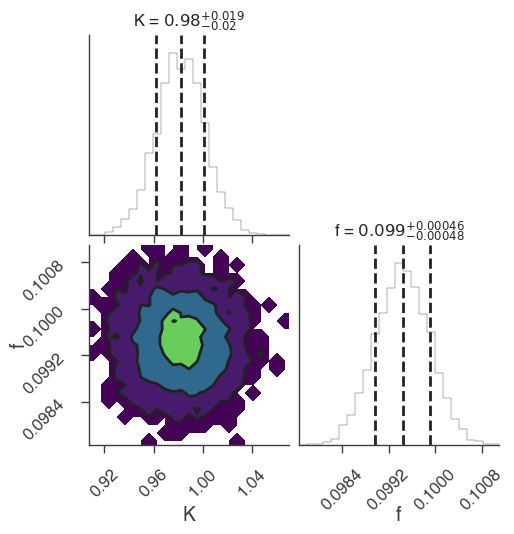

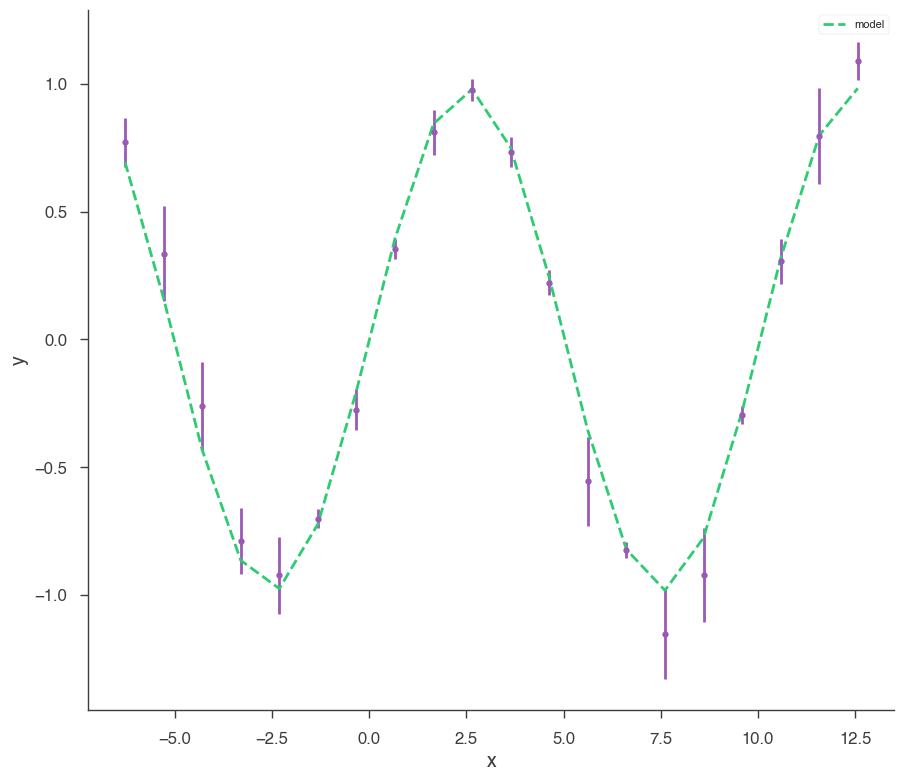

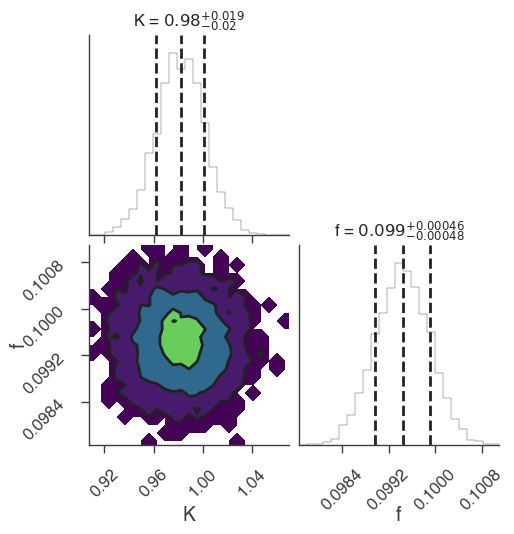

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

         INFO      sampler set to zeus                                                     ]8;id=840381;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=806011;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 47.03it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:11, 53.61it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:10, 59.36it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:10, 58.64it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:09, 65.12it/s]

Sampling progress :   6%|▌         | 39/625 [00:00<00:09, 64.98it/s]

Sampling progress :   7%|▋         | 46/625 [00:00<00:08, 64.80it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:08, 65.15it/s]

Sampling progress :  10%|▉         | 60/625 [00:00<00:08, 65.73it/s]

Sampling progress :  11%|█         | 68/625 [00:01<00:08, 69.44it/s]

Sampling progress :  12%|█▏        | 75/625 [00:01<00:08, 67.23it/s]

Sampling progress :  13%|█▎        | 82/625 [00:01<00:08, 66.52it/s]

Sampling progress :  14%|█▍        | 89/625 [00:01<00:07, 67.00it/s]

Sampling progress :  15%|█▌        | 96/625 [00:01<00:08, 65.37it/s]

Sampling progress :  17%|█▋        | 104/625 [00:01<00:07, 68.00it/s]

Sampling progress :  18%|█▊        | 111/625 [00:01<00:07, 67.48it/s]

Sampling progress :  19%|█▉        | 120/625 [00:01<00:07, 71.69it/s]

Sampling progress :  20%|██        | 128/625 [00:01<00:07, 70.90it/s]

Sampling progress :  22%|██▏       | 136/625 [00:02<00:07, 69.30it/s]

Sampling progress :  23%|██▎       | 144/625 [00:02<00:06, 71.71it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 72.59it/s]

Sampling progress :  26%|██▌       | 160/625 [00:02<00:06, 73.49it/s]

Sampling progress :  27%|██▋       | 168/625 [00:02<00:06, 73.72it/s]

Sampling progress :  28%|██▊       | 177/625 [00:02<00:05, 76.59it/s]

Sampling progress :  30%|██▉       | 185/625 [00:02<00:05, 73.74it/s]

Sampling progress :  31%|███       | 193/625 [00:02<00:05, 74.48it/s]

Sampling progress :  32%|███▏      | 201/625 [00:02<00:06, 70.50it/s]

Sampling progress :  33%|███▎      | 209/625 [00:03<00:05, 70.42it/s]

Sampling progress :  35%|███▍      | 217/625 [00:03<00:05, 71.31it/s]

Sampling progress :  36%|███▌      | 225/625 [00:03<00:05, 72.49it/s]

Sampling progress :  37%|███▋      | 233/625 [00:03<00:05, 72.86it/s]

Sampling progress :  39%|███▊      | 242/625 [00:03<00:05, 75.75it/s]

Sampling progress :  40%|████      | 250/625 [00:03<00:05, 74.60it/s]

Sampling progress :  41%|████▏     | 258/625 [00:03<00:05, 71.87it/s]

Sampling progress :  43%|████▎     | 266/625 [00:03<00:04, 72.48it/s]

Sampling progress :  44%|████▍     | 274/625 [00:03<00:05, 69.86it/s]

Sampling progress :  45%|████▌     | 282/625 [00:04<00:05, 66.84it/s]

Sampling progress :  46%|████▌     | 289/625 [00:04<00:05, 65.06it/s]

Sampling progress :  48%|████▊     | 297/625 [00:04<00:04, 67.75it/s]

Sampling progress :  49%|████▉     | 305/625 [00:04<00:04, 69.30it/s]

Sampling progress :  50%|████▉     | 312/625 [00:04<00:04, 68.15it/s]

Sampling progress :  51%|█████     | 319/625 [00:04<00:04, 63.14it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:04<00:04, 62.90it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:04<00:04, 61.28it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:04<00:04, 61.84it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:05<00:04, 61.30it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:05<00:04, 63.59it/s]

Sampling progress :  58%|█████▊    | 361/625 [00:05<00:04, 62.99it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:05<00:03, 64.82it/s]

Sampling progress :  60%|██████    | 376/625 [00:05<00:03, 66.24it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:05<00:03, 68.84it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:05<00:03, 67.15it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:05<00:03, 68.00it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:05<00:03, 69.55it/s]

Sampling progress :  66%|██████▋   | 415/625 [00:06<00:02, 71.11it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:06<00:02, 68.60it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:06<00:02, 69.81it/s]

Sampling progress :  70%|███████   | 439/625 [00:06<00:02, 72.04it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:06<00:02, 69.16it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:06<00:02, 71.30it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:06<00:02, 72.74it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:06<00:02, 73.57it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:06<00:02, 72.10it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:07<00:01, 69.56it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:07<00:01, 70.52it/s]

Sampling progress :  81%|████████  | 504/625 [00:07<00:01, 74.27it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:07<00:01, 77.15it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:07<00:01, 74.73it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:07<00:01, 74.76it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:07<00:01, 69.44it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:07<00:01, 69.73it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:08<00:01, 68.15it/s]

Sampling progress :  90%|████████▉ | 560/625 [00:08<00:00, 65.60it/s]

Sampling progress :  91%|█████████ | 567/625 [00:08<00:00, 65.85it/s]

Sampling progress :  92%|█████████▏| 574/625 [00:08<00:00, 59.29it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:08<00:00, 57.69it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:08<00:00, 53.70it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:08<00:00, 52.83it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:08<00:00, 51.68it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:09<00:00, 52.46it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:09<00:00, 52.32it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:09<00:00, 53.06it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:09<00:00, 53.88it/s]

Sampling progress : 100%|██████████| 625/625 [00:09<00:00, 66.64it/s]

18:43:29 INFO      fit restored to maximum of posterior                                         ]8;id=748980;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=265612;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=333742;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=95199;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 28


Scale Factor: 1.572088


Mean Integrated Autocorrelation Time: 2.98


Effective Sample Size: 4197.65


Number of Log Probability Evaluations: 64355


Effective Samples per Log Probability Evaluation: 0.065227


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.82 -0.19 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.94 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.372815
total,-5.372815


Values of statistical measures:

,statistical measures
AIC,15.451512
BIC,16.737094
DIC,14.693727
PDIC,1.973932


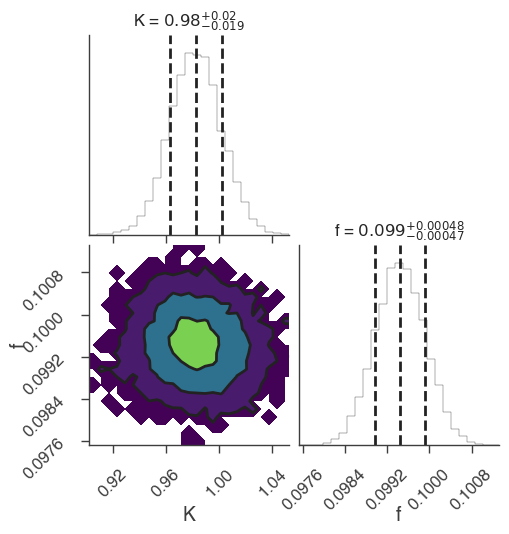

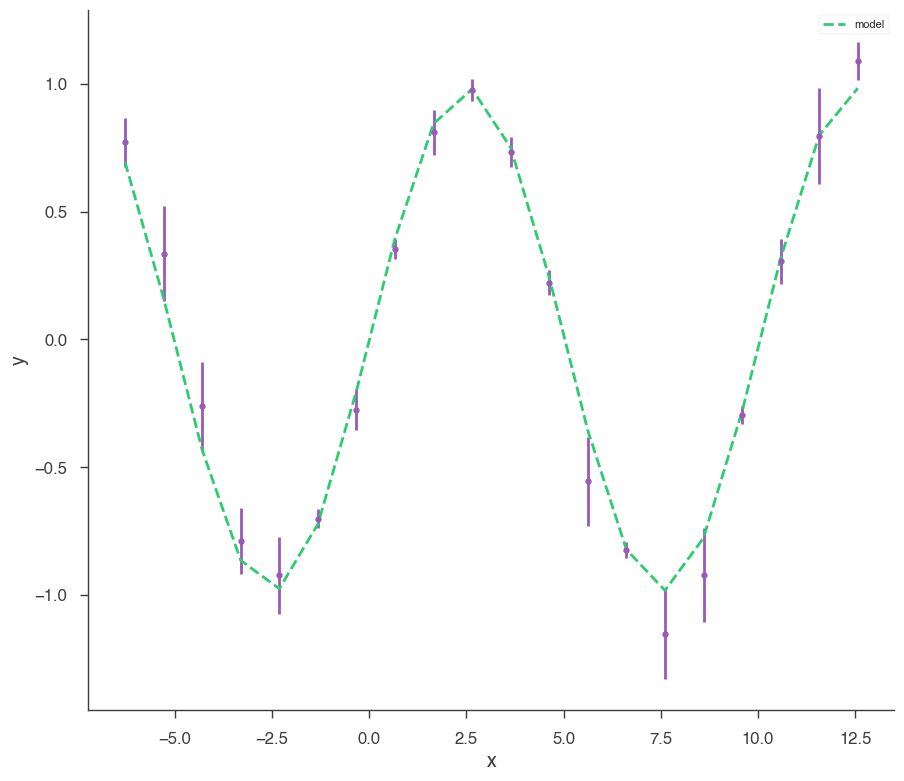

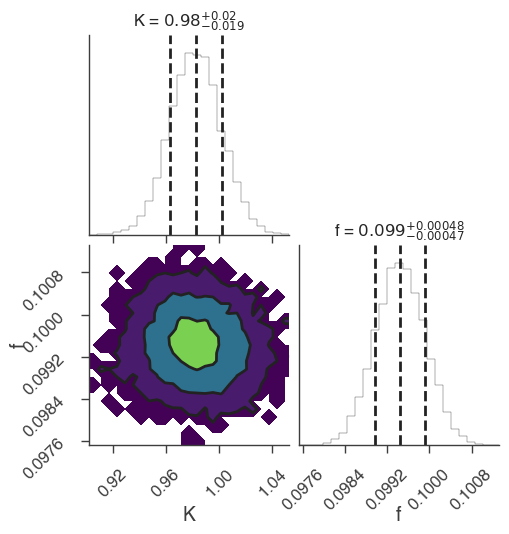

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

18:43:30 INFO      sampler set to ultranest                                                ]8;id=819755;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=546031;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5  


[ultranest] Likelihood function evaluations: 7923


[ultranest]   logZ = -14.54 +- 0.103


[ultranest] Effective samples strategy satisfied (ESS = 977.3, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


18:43:38 INFO      fit restored to maximum of posterior                                         ]8;id=598416;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=789599;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=509401;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=61169;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.81 -0.18 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.94 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-5.375886
total,-5.375886


Values of statistical measures:

,statistical measures
AIC,15.457655
BIC,16.743237
DIC,14.871057
PDIC,2.062487
log(Z),-6.317673


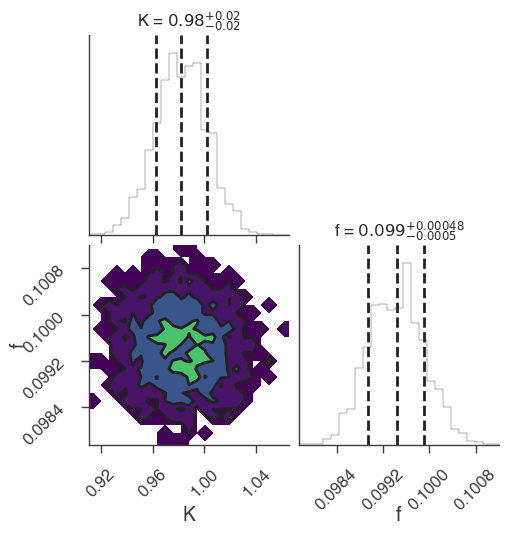

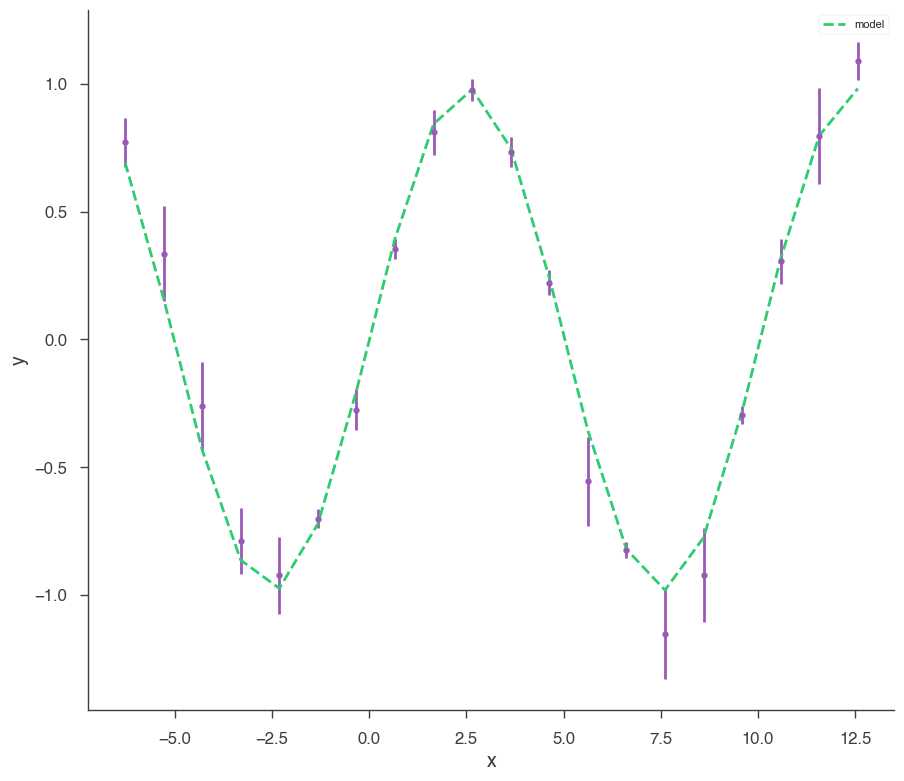

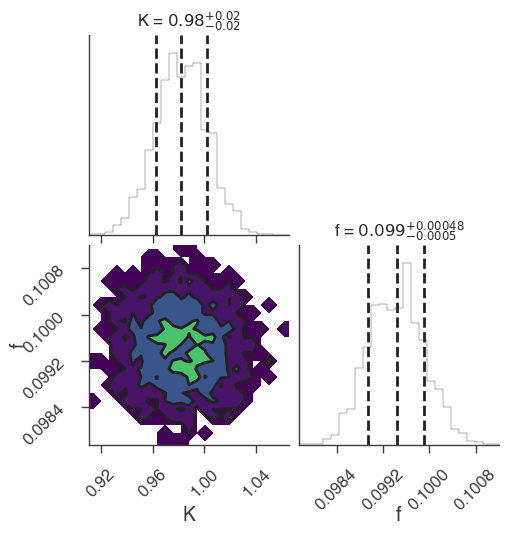

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()